 # 回帰1:映画の興行収入の予測

In [62]:
import unittest
import doctest
import os
from domain import CSVRepository, SQLRepository, CategoricalData, DataVisualization, convert_categoricals

path = os.path.dirname(os.path.abspath(__file__))
repo = SQLRepository(table='Cinema')
#repo = CSVRepository(file= path + '/data/cinema.csv')

 ## データの内容
 | 列名 | 内容 |
 | --- | --- |
 | cinema_id | 映画作品のID |
 | SNS1 | 公開後10日以内にSNS1でつぶやかれた数 |
 | SNS2 | 公開後10日以内にSNS2でつぶやかれた数 |
 | actor | 主演俳優の昨年のメディア露出度。actorの値が大きいほど露出している |
 | original | 原作があるかどうか（あるなら1,ないなら0） |
 | sales | 最終的な興行収入（単位:万円） |

In [63]:
df = repo.get_data()
df.head(3)

,cinema_id,sns1,sns2,actor,original,sales
0,1375,291,1044,8808.994029,0,9731
1,1000,363,568,10290.70937,1,10210
2,1390,158,431,6340.388534,1,8227


 ## 問題背景

 ## データ分析の方法検討
 - 特徴量を「公開後10日以内にSNS1でつぶやかれた数、公開後10日以内にSNS2でつぶやかれた数、主演俳優の昨年のメディア露出度、原作があるかどうか」、目的変数を「最終的な興行収入」として、映画の興行収入を予測する。

 # 分析の実施

 ### データの概要

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cinema_id  95 non-null     int64 
 1   sns1       95 non-null     object
 2   sns2       95 non-null     object
 3   actor      95 non-null     object
 4   original   95 non-null     int64 
 5   sales      95 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 4.6+ KB


 ### データの統計量

In [65]:
df.describe()

,cinema_id,original,sales
count,95.000000,95.000000,95.000000
mean,1474.810526,0.505263,9881.147368
std,291.965434,0.502625,809.804363
min,1000.000000,0.000000,7869.000000
25%,1235.000000,0.000000,9305.000000
50%,1460.000000,1.000000,9964.000000
75%,1741.500000,1.000000,10442.500000
max,1989.000000,1.000000,11405.000000


 ### データの特徴量の相関確認

In [66]:
categorical_cols = ['sales']
df_conv = convert_categoricals(df, categorical_cols)
df_conv.corr()

,cinema_id,original,sales
cinema_id,1.000000,-0.075603,-0.065454
original,-0.075603,1.000000,0.436268
sales,-0.065454,0.436268,1.000000


 ### データの数値変数確認

In [67]:
df.select_dtypes(include='number').columns

Index(['cinema_id', 'original', 'sales'], dtype='object')

 ### originalカテゴリ

In [68]:
original = CategoricalData(df, 'original')

In [69]:
original.show()

1    48
0    47
Name: original, dtype: int64

<Axes: >

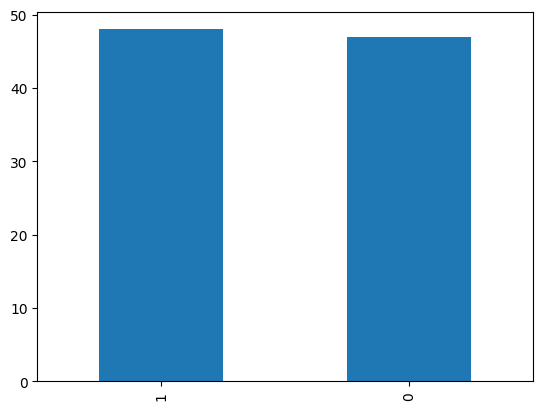

In [70]:
original.plot()

## %% [markdown]
# ### 種類カテゴリの数値変換

<Axes: >

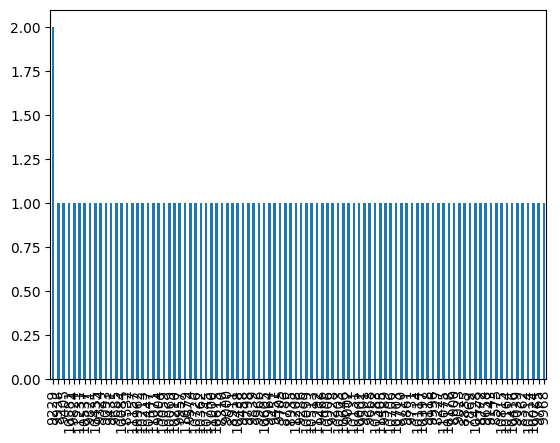

In [71]:
categorical_cols = ['original']
df_conv = convert_categoricals(df, categorical_cols)
conv_species = CategoricalData(df_conv, 'sales')
conv_species.plot()

 ### ピボットテーブルによる集計

In [72]:
original.pivot('sales', 'sns1')

original,0,1
sales,,
7869,NaN,1.0
8000,1.0,NaN
8227,NaN,1.0
8310,1.0,NaN
8362,1.0,NaN
...,...,...
11157,NaN,1.0
11208,NaN,1.0
11231,NaN,1.0


In [73]:
original.pivot('sales', 'sns2')

original,0,1
sales,,
7869,NaN,1.0
8000,1.0,NaN
8227,NaN,1.0
8310,1.0,NaN
8362,1.0,NaN
...,...,...
11157,NaN,1.0
11208,NaN,1.0
11231,NaN,1.0


In [74]:
original.pivot('sales', 'actor')

original,0,1
sales,,
7869,NaN,1.0
8000,1.0,NaN
8227,NaN,1.0
8310,1.0,NaN
8362,1.0,NaN
...,...,...
11157,NaN,1.0
11208,NaN,1.0
11231,NaN,1.0


 ### ダミー変数化

In [75]:
df_dummy = original.dummy()
df_dummy

,cinema_id,sns1,sns2,actor,sales,original_0,original_1
0,1375,291,1044,8808.994029,9731,1,0
1,1000,363,568,10290.70937,10210,0,1
2,1390,158,431,6340.388534,8227,0,1
3,1499,261,578,8250.485081,9658,1,0
4,1164,209,683,10908.53955,9286,1,0
...,...,...,...,...,...,...,...
90,1344,606,551,7997.044307,9938,1,0
91,1260,494,1050,11137.48281,10537,0,1
92,1283,505,928,11376.03854,10084,0,1
93,1861,368,966,10393.25248,10069,1,0


 ### データのカテゴリ変数確認

In [76]:
df.select_dtypes(include='object').columns

Index(['sns1', 'sns2', 'actor'], dtype='object')

 ### データの可視化

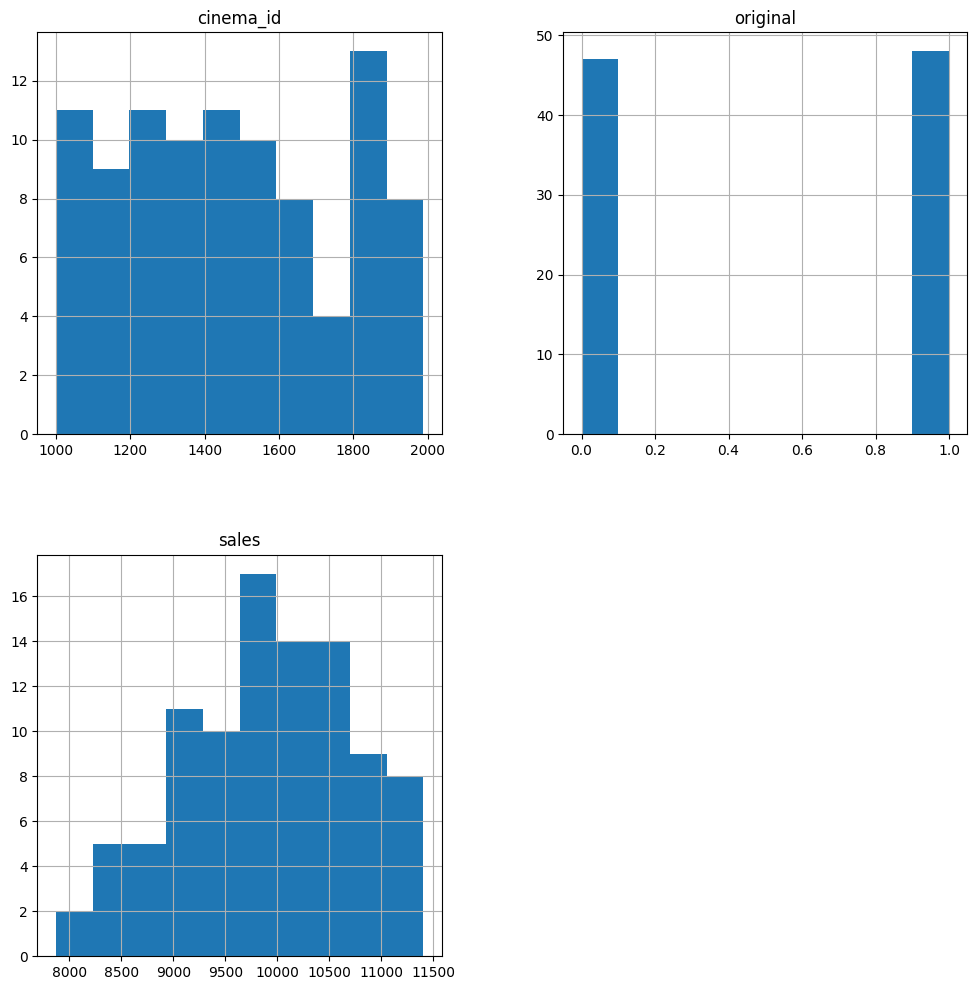

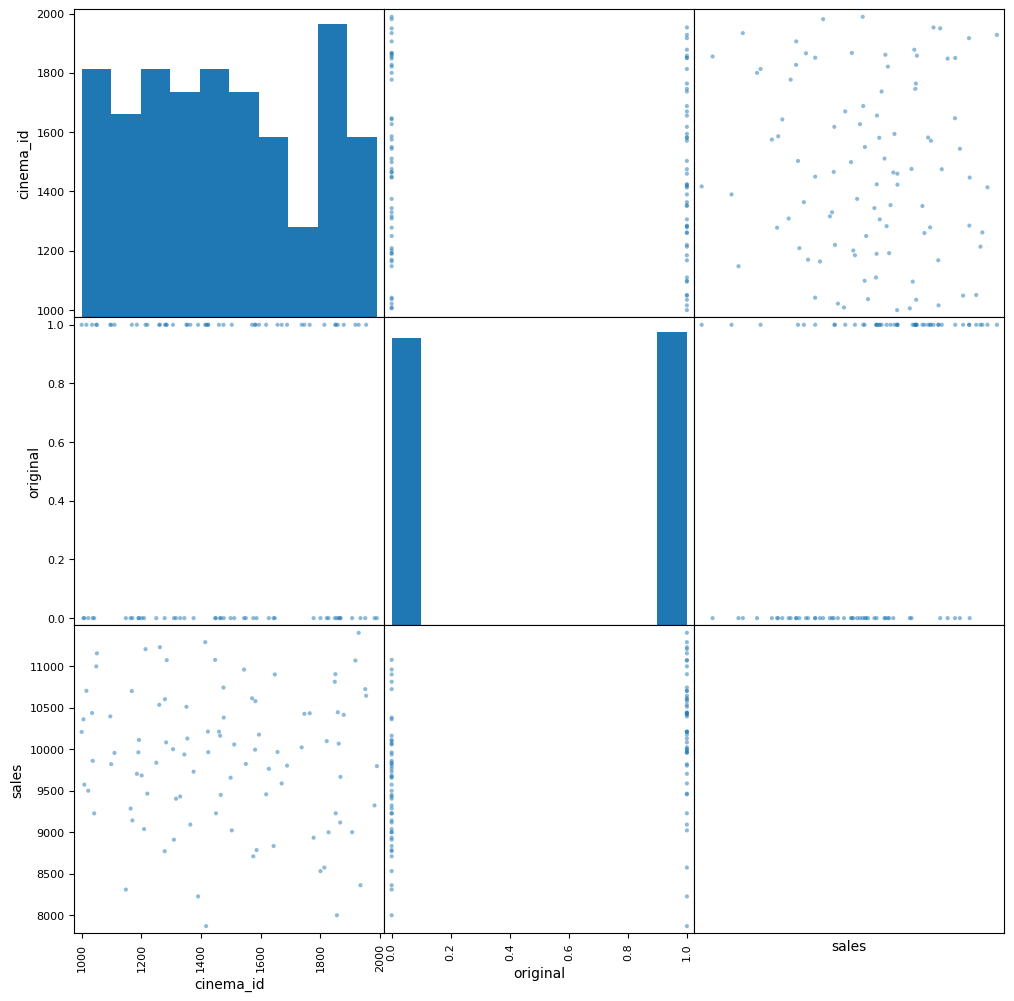

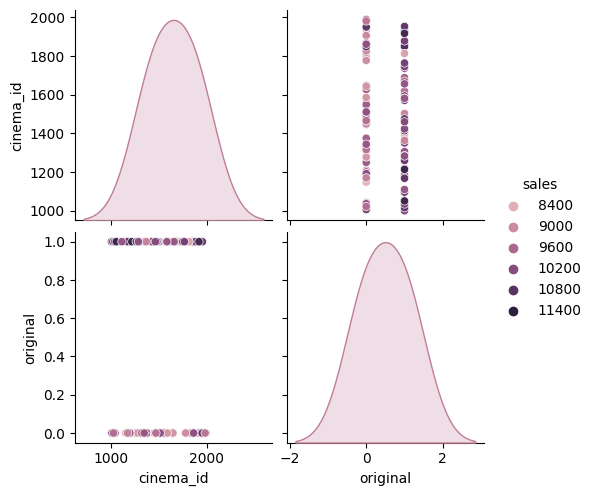

In [77]:
dv = DataVisualization(df)
dv.df_all('sales')

 ## データの前処理

 ### 欠損地処理（行削除・全体代表値埋め、グループ代表値埋め）

 ### 各手法を必要に応じて実施

 - 外れ値の除外
 - 多項式特徴量・交互作用特徴量の追加
 - 特徴量の絞り込み
 - 標準化

 ## モデルの作成と学習

 ### 未学習状態モデルの生成（分類なら決定木、回帰なら線形回帰）

 ### 訓練データで学習（必要に応じて不均衡データ補正）

 ## モデルの評価

 ### 検証データで評価し指標確認（分類なら正解率、回帰なら決定係数）

 ### NG:改善案検討前処理に戻る
 ### OK:最終性能評価（テストデータで評価）

In [78]:
doctest.testmod(verbose=True)
unittest.main(argv=[''], verbosity=2, exit=False)

3 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
0 tests in 3 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK
